# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

## Изучение данных из файла

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df. head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info() # получение общей информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [3]:
df = df.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [4]:
df.isna().mean() # подсчёт пропусков в долевом соотношении

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
city_centers_nearest    0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [5]:
df.duplicated().sum() # проверяем на наличие дубликатов

0

### Вывод

При изучении данных видно, что имеются пропуски. Дубликатов не имеется. Исправлено некорректное название столбца 'cityCenters_nearest'

## Предобработка данных

Рассмотрим пропуски в столбцах

**Столбец 'ceiling_height'**

In [6]:
df[df['ceiling_height']. isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
11,9,3300000.0,44.00,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
14,1,4400000.0,36.00,2016-06-23T00:00:00,1,NaN,6.0,17.00,1,NaN,...,8.00,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0


In [7]:
meian_ceiling_height = df['ceiling_height'].median() # получаем средне медианное значение для заполнеие пропусков

In [8]:
df['ceiling_height'] = df['ceiling_height'].fillna(value=meian_ceiling_height) # заполняем пропуски и проверяем результат
df['ceiling_height']. isna().sum()

0

В данном столбце логики в пропусках не прослеживается, удалить строки непозволительно (слишком большая доля). Поэтому принято решение заполнить пропуски медианным значением.

**Столбец 'floors_total'**

In [9]:
df[df['floors_total']. isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [10]:
df = df.dropna(subset=['floors_total'])

In [11]:
df['floors_total'].isna().sum()

0

В данном столбце рациональным способом не заполнить пропуски, так как нет никакой связи и логики в них. Доля этих пропусков очень мала и на результаты не повлияет, поэтому можно их удалить.

**Столбец 'living_area'**

In [12]:
df[df['living_area']. isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [13]:
mean_area = (df['living_area']/df['total_area']).mean() # среднее соотношение жилой площади от общей
df['living_area'] = df['living_area'].fillna(df['total_area']*mean_area)
df['living_area']

0        51.000000
1        18.600000
2        34.300000
3        89.826726
4        32.000000
           ...    
23694    73.300000
23695    38.000000
23696    29.700000
23697    43.359756
23698    12.300000
Name: living_area, Length: 23613, dtype: float64

In [14]:
df['living_area']. isna().sum()

0

В данном столбце пропуски нельзя было удалить, так как они нужны в дальнейшем, принято было заполнить так:

- найти средний коэффициент  соотношения жилой площади от  общей (где это возможно)
- и заполнить пропуски через коэффициент , умножая его на значение общей площади

**Столбец 'is_apartment'**

In [15]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Данной большое количесвто пропусков можно объясить тем, что люди сдающие/продающие не обращали внимание на этот вопрос. Так как владельцы аппартаментов удиляли вниманию данному пункту.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].isna().sum()

0

Исходя из гипотизы, все пропуски заменены на значение False

**Столбец 'kitchen_area'**

In [17]:
df[df['kitchen_area'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,89.826726,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,18.530293,2,False,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,25.874617,1,False,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,22.597918,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,26.270080,13,False,...,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
60,3,2740000.0,35.0,2018-01-01T00:00:00,1,2.65,12.0,19.773179,8,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,38.416461,6,False,...,NaN,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,3,4500000.0,80.5,2018-01-15T00:00:00,3,2.65,25.0,45.478311,16,False,...,NaN,NaN,посёлок Шушары,12430.0,18217.0,0.0,NaN,0.0,NaN,60.0
133,12,3150000.0,31.0,2018-03-23T00:00:00,1,2.65,25.0,17.513387,6,False,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,78.0
144,1,2450000.0,27.0,2017-03-30T00:00:00,0,2.65,24.0,15.500000,2,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0


In [18]:
mean_area_kitchen = (df['kitchen_area']/df['total_area']).mean() # среднее соотношение куханной площади от общей
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*mean_area_kitchen)
df['kitchen_area']

0        25.000000
1        11.000000
2         8.300000
3        29.784520
4        41.000000
           ...    
23694    13.830000
23695     8.500000
23696    10.621272
23697    23.300000
23698     9.000000
Name: kitchen_area, Length: 23613, dtype: float64

In [19]:
df['studio'] = df.loc[df['studio']==True, 'kitchen_area'] = 0


In [20]:
df['oprn_plan'] = df.loc[df['open_plan']==True, 'kitchen_area'] = 0

In [21]:
df['kitchen_area'].isna().sum()

0

В данном столбце применён тот же способ, что и с столбцом 'living_area' с некоторыми корректировками. Ведь о кухонной площади в студии и квартирах(общей планировки) мы знаем, они равны 0.

**Столбец 'balcony'**

In [22]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

В данном столбце пропуски заменены 0, так как можно предположить, что у кого нет балкона, не заполнял данную строчку.

**Столбец 'locality_name'**

In [23]:
df = df.dropna(subset=['locality_name'])

In [24]:
df['locality_name'].isna().sum()

0

В данном столбце решено удалить строки с пропусками, так как их количество ничтожно мало и на результаты оно не повлияет.

**Столбец 'days_exposition' и столбец 'city_centers_nearest'**

Данные столбцы имеют значительное количество пропусков, но заменить мы их не можем, так как невозможно рационально подобрать подходящий метод. Поэтому оставляем без изменений.


Пропуски в остальных столбцах, я заполнять не буду, так как для моего исследования они мне не нужны.

Приведем данные к нужному типу

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null bool
studio                  23565 non-null int64
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        18041 non-null float64
city_centers_nearest    18064 non-null float64
parks_around3000        18065 non-null float64
parks_nearest           8030 non-null float64
ponds_around300

Столбцы 'floors_total', 'balcony'. Должны быть целочисленные, так как этаж и балкон не могут иметь дробные значения.

In [26]:
df['floors_total'] = df['floors_total'].astype(int)

In [27]:
df['balcony'] = df['balcony'].astype(int)

В некоторых столбцах очень большая дробная часть, и чтобы визуально легче было изучать данные, нужно "отбросить" её.

In [28]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,oprn_plan
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.600000,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,89.826726,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0


В данном столбце должен тип данных datetime, потому что в таком типе должна хранится данные о дате.

In [29]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**Вывод**

В данном этапе исправлена проблема с пропусками (где это возможно), преобразованы данные в нужный тип.

## Расчёты и добавление результатов в таблицу

**Рассчитаем и добавим в таблицу цену 1 метра квадратного**

In [30]:
df['price_metr'] = df['last_price'] / df['total_area']

In [31]:
df['price_metr'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118349e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_metr, dtype: float64

**Рассчитаем и добавим в таблицу денб недели, месяц, год побликации**

День недели

In [32]:
df['weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday

Месяц

In [33]:
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month

Год

In [34]:
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [35]:
df[['first_day_exposition', 'weekday', 'month', 'year']].head() # проверяем результат

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


**Определим этаж квартиры**

Для этого создадим функцию, которая поможет категоризировать этаж квартиры на:
- первый
- последний
- другой

In [36]:
def floor_level(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [37]:
df['floor_level'] = df.apply(floor_level, axis=1)


In [38]:
df[['floor', 'floors_total', 'floor_level']].head(10) # проверяем результат

,floor,floors_total,floor_level
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


**Определим отношение жилой площади к общей и площади кухни к общей**

Отношение жилой площади к общей

In [39]:
df['living_to_total'] = (df['living_area'] / df['total_area']).round(2) # округляя до сотых

Отношение площади кухни к общей 

In [40]:
df['kitchen_to_total'] = (df['kitchen_area'] / df['total_area']).round(2)

In [41]:
df[['total_area', 'living_area', 'kitchen_area', 'living_to_total', 'kitchen_to_total']].head(10)

,total_area,living_area,kitchen_area,living_to_total,kitchen_to_total
0,108.00,51.000000,25.00000,0.47,0.23
1,40.40,18.600000,11.00000,0.46,0.27
2,56.00,34.300000,8.30000,0.61,0.15
3,159.00,89.826726,29.78452,0.56,0.19
4,100.00,32.000000,41.00000,0.32,0.41
5,30.40,14.400000,9.10000,0.47,0.30
6,37.30,10.600000,14.40000,0.28,0.39
7,71.60,40.450274,18.90000,0.56,0.26
8,33.16,15.430000,8.81000,0.47,0.27
9,61.00,43.600000,6.50000,0.71,0.11


**Вывод**

На данном шаге проведены расчёты и добавлены в таблицу: 

- цена 1 метра

- день недели, месяц и год подачи объявления

- жилая площадь/общая площадь и площадь кухни/общая площадь

## Исследовательский анализ данных

Изучим такой параметр, как **площадь** и построем график

In [42]:
df['total_area'].describe().round()

count    23565.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         70.0
max        900.0
Name: total_area, dtype: float64

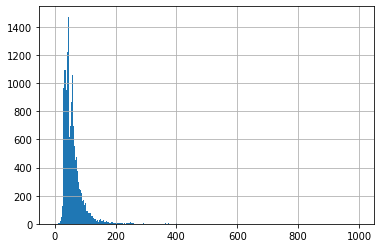

In [43]:
df['total_area'].hist(bins='auto', range=(0,1000))

На графике мы видим, что большее количество  квартир с площадью около 50 квартир, количесвто квартир с площадью 200 кв. м и более - очень  мало.
Для наглядности выделим отрезок с наибольшем количеством квартир.

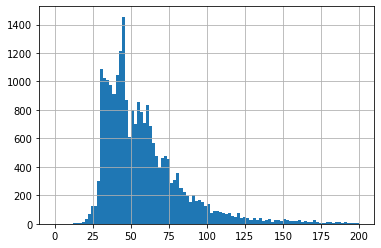

In [44]:
df['total_area'].hist(bins='auto', range=(0,200))

Теперь более четко видно, что наиболее множественна квартира площадью ~ 45 кв. м 

Исследуя график:

Меньше всех квартир с площадью от 12 до 20 кв. м и в промежутке от 300 до 900 кв. м

Изучим столбец  **цены** и построим график

In [45]:
df['last_price'].describe().round()

count        23565.0
mean       6540058.0
std       10910935.0
min          12190.0
25%        3400000.0
50%        4646000.0
75%        6790000.0
max      763000000.0
Name: last_price, dtype: float64

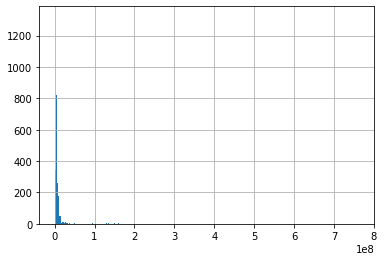

In [46]:
df['last_price'].hist(bins='auto')

График вовсе не показателен, нужно урезать диапазон, чтобы разглядеть поподробнее.

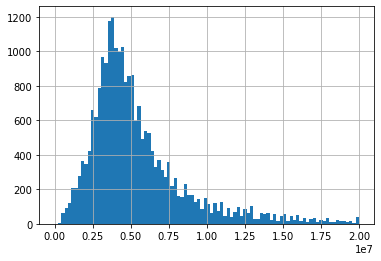

In [47]:
df['last_price'].hist(bins='auto', range=(0,20000000))

Самый высокий уровень у объявления с ценой ~ 3500000, после отметки в 20000000, количество объявлений с такой ценой очень мало

Изучим столбец **количество комнат** и построим график

In [48]:
df['rooms'].describe().round()

count    23565.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

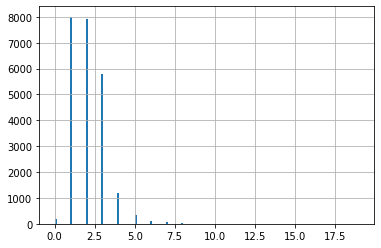

In [49]:
df['rooms'].hist(bins='auto')

График вовсе не показателен, нужно урезать диапазон, чтобы разглядеть поподробнее.

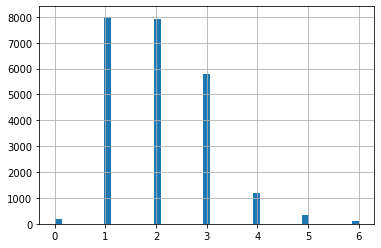

In [50]:
df['rooms'].hist(bins='auto', range=(0,6))

В данном отрезке можно точно определить, что больше всего квартир с 1 комнатой, и очень близко, по количеству, квартиры с 2 комнатами. Меньше всего объявлений квартир с 6 и более комнатами.

Изучим столбец **высота потолков** и построим график

In [51]:
df['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

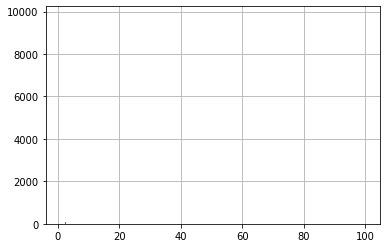

In [52]:
df['ceiling_height'].hist(bins='auto')

График вовсе не показателен, нужно урезать диапазон, чтобы разглядеть поподробнее.

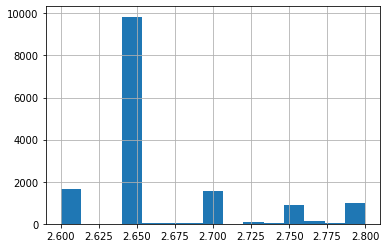

In [53]:
df['ceiling_height'].hist(bins='auto', range=(2.6,2.8))

В данном отрезке можно точно определить, что больше всего квартир с высотой потолков 2.65

Изучим **время продажи** квартиры

In [54]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

На данном выводе можно выделить среднее значение и медиану.

Медиана составляет 95 дней

Среднее значение ~ 181 день

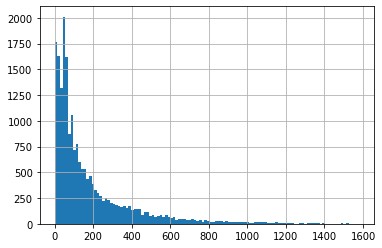

In [55]:
df['days_exposition'].hist(bins='auto')

На графике мы видим большой пик у 0. Но наибольшее значение точно определить тяжело, урежем диапазон.

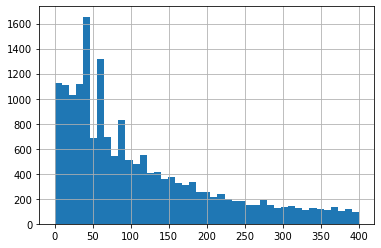

In [56]:
df['days_exposition'].hist(bins='auto', range=(0,400))

Теперь видно, что больше всего объявлеий находятся на сервисе около 50 дней

Теперь видно, что больше всего объявлений находятся на сервисе около 50 дней.

Исследуя весь график можно сделать выводы и ответить на оставшиеся вопросы:

1.	В основном время продажи составлять от 0 до 300 дней

2.	Необычно быстрой продажей можно считать, квартиру, которая продалась в первый месяц подачи объявления.

3.	Необычно долгой продажей можно считать, квартиру, которая продавалась дольше 2 лет и таких объявлений крайне мало (о чём свидетельствует медиана меньшая по сравнению с средним значением).

Далее изучим это подробнее


Анализ **редких и выбивающихся** значений

In [57]:
df['fast'] = df['days_exposition'] < 30
mean_fast = df['fast'].mean()  # процент быстрых продаж
mean_fast


0.14920432845321452

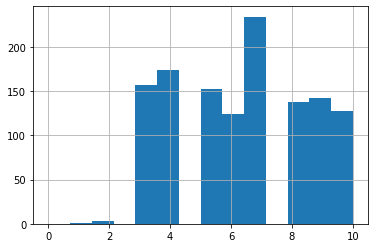

In [58]:
df['days_exposition'].hist(bins='auto', range=(0, 10)) # график для вывода

In [59]:
df['slow'] = df['days_exposition'] > 510
mean_fast = df['slow'].mean()  # процент долгих продаж
mean_fast


0.07074050498620836

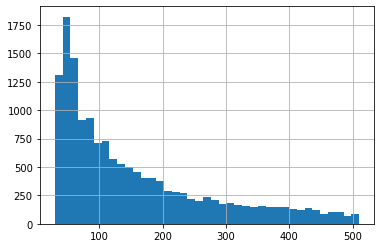

In [60]:
df['days_exposition'].hist(bins='auto', range=(30,510))

На данном этапе можно сказать:

1.	Доля быстрых продаж составляет почти 15%, и я считаю, что это нормальная доля. Возможно, что так быстро расходятся очень выгодные предложения, также может быть снято с публикации связи, например, с мошенничеством. И как видно на графике (см график для вывода) в первые 2 дня ничтожно мало снято объявлений. Так что можно оставить данный от 4 дней.

2.	Доля долгих продаж мала (7%) их можно смело удалить. Возможно, это связано с тем, что невыгодное предложение, квартира может не продаваться совсем и в конце концов снято с публикации по истечению срока размещения. Возьмем крайнее правое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

И можно сделать вывод, что большинство квартир продаётся в течение полугода со дня размещения.


In [61]:
ok_df = df.query('4 <= days_exposition <= 510')

In [62]:
df['small_total_area'] = df['total_area'] < 50
mean_small = df['small_total_area'].mean()
mean_small

0.4619562911096966

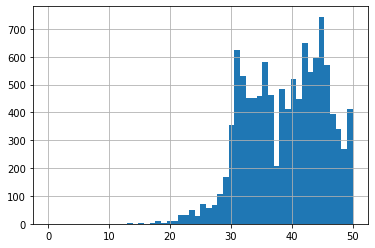

In [63]:
df['total_area'].hist(bins='auto', range=(0,50)) # график для вывода

In [64]:
df['big_total_area'] = df['total_area'] > 100
mean_big = df['big_total_area'].mean()
mean_big


0.07723318480797793

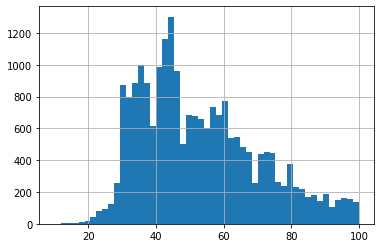

In [65]:
df['total_area'].hist(bins='auto', range=(10,100)) 

На данном этапе можно сказать:

1.	Доля квартир с малой площадью весома (почти 50%). В данных нет никакой аномалии, естественно, что таких квартир много, они чаще всего скупаются, так как являются более доступными.

2.	Доля квартир с большой площадью мала (почти 8%). Что тоже естественно, так как из-за дороговизны больших квартир данного предложения мало. Возьмем крайнее правое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

Подводя итоги, самыми распространёнными являются квартиры с площадью 30-60 кв. м


In [66]:
ok_df = ok_df.query('10 <= total_area <= 100')

In [67]:
df['low_last_price'] = df['last_price'] < 5000000
mean_low = df['low_last_price'].mean()
mean_low


0.5585826437513262

In [68]:
df['high_last_price'] = df['last_price'] > 10000000
mean_high = df['high_last_price'].mean()
mean_high


0.114491831105453

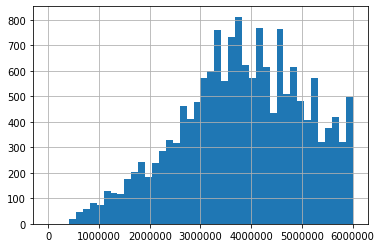

In [69]:
df['last_price'].hist(bins='auto', range=(0,6000000)) # график для вывода

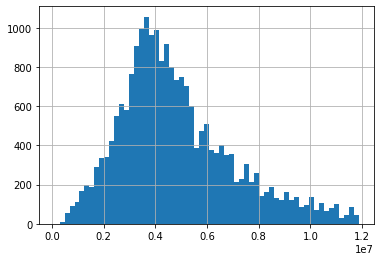

In [70]:
df['last_price'].hist(bins='auto', range=(100000,11875000))

Таким образом можно сказать:

1.	Доля квартир с небольшой ценой велика (55%). В данных нет никакой аномалии, естественно, что таких квартир много, они чаще всего скупаются, так как являются более доступными. Возьмем крайнее левое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

2.	Доля квартир с высокой ценой незначительна (11%). Что тоже естественно, так как из-за дороговизны квартир, данного предложения мало. Возьмем крайнее правое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5). 

Подводя итоги, самыми распространёнными являются квартиры стоимостью от 3 до 6 млн. д. е.


In [71]:
ok_df = ok_df.query('1000000 <= last_price <= 11875000')

In [72]:
df['few_rooms'] = df['rooms'] <= 2
mean_fast = df['few_rooms'].mean() 
mean_fast

0.683004455760662

In [73]:
df['many_rooms'] = df['rooms'] >= 6
mean_fast = df['many_rooms'].mean() 
mean_fast

0.008232548270740506

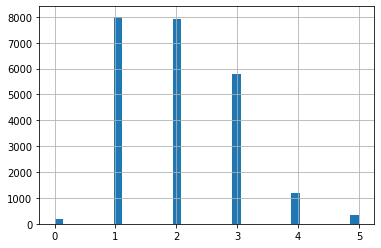

In [74]:
df['rooms'].hist(bins='auto', range=(0,5))

Таким образом можно сказать:

Доля квартир с небольшим количеством комнат значительно (68%). Что нормально, ведь чаще всего скупаются из-за малой стоимости. Возьмем крайнее левое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

Доля многокомнатных квартир ничтожно мала (менее 1%). Что тоже естественно, так как из-за дороговизны многокомнатных квартир, данного предложения мало. Возьмем крайнее правое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5).

Подводя итоги, самыми распространёнными являются квартиры с количеством комнат от 1 до 3.


In [75]:
ok_df = ok_df.query('0 <= rooms <= 4')

In [76]:
df['low_ceiling_height'] = df['ceiling_height'] < 2.4
mean_fast = df['low_ceiling_height'].mean() 
mean_fast

0.0008911521323997453

In [77]:
df['tall_ceiling_height'] = df['ceiling_height'] >= 2.6
mean_fast = df['tall_ceiling_height'].mean() 
mean_fast

0.7814555484829195

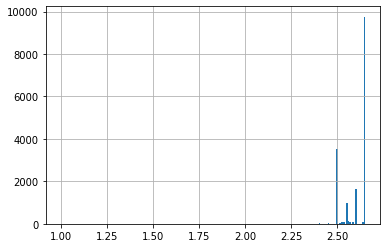

In [78]:
df['ceiling_height'].hist(bins='auto', range=(1, 2.65)) # график для вывода

Таким образом можно сказать:

Доля квартир с низкими потолками ничтожно мала (менее 1%). Что нормально, ведь это очень низкие потолки (ниже стандарта), такие никто не захочет такие покупать с целью проживания. Возьмем крайнее левое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

Доля квартир с высокими потолками велика (79%). Очевидно, что людям хочется простора тем и объясняется такое большое предложение. Возьмем крайнее правое значение "уса" для обозначения границ (рассчитанный как межквартальное размах * 1.5)

Подводя итоги, самыми распространёнными являются квартиры с высотой потолков 2.65 м.


In [79]:
ok_df = ok_df.query('2.45 <= ceiling_height <= 2.85')

In [80]:
ok_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,oprn_plan,price_metr,weekday,month,year,floor_level,living_to_total,kitchen_to_total,fast,slow
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,82920.792079,1,12,2018,первый,0.46,0.27,False,False
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,95065.789474,0,9,2018,другой,0.47,0.30,False,False
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,99195.710456,3,11,2017,другой,0.28,0.39,False,False
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,87454.764777,2,5,2018,другой,0.47,0.27,False,False
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,88524.590164,6,2,2017,другой,0.71,0.11,False,False


**Можно сделать вывод**

В данном подпункте мы проанализировали редкие и выбивающиеся значения и избавились от выбросов опираясь на 1 и 2 подпункте. Построены гистограммы и сделаны выводы.

**Факторы вляющие на стоимость квартиры**

In [81]:
ok_df['last_price'].corr(df['total_area'])

0.6792215818956204

Данная связь сильная, что говорит о том, что влияет на цену

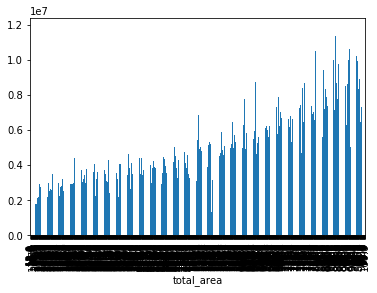

In [82]:
from_area = ok_df.groupby('total_area')['last_price'].mean()
from_area.plot(x='total_area', y='last_price', kind='bar')

Можно сказать, что график подтверждает вышесказанные выводы. Чем больше площадь, тем больше цена.

In [83]:
ok_df['last_price'].corr(df['rooms'])

0.4122529315572511

Данная связь умеренная, что говорит о малом влияние на цену

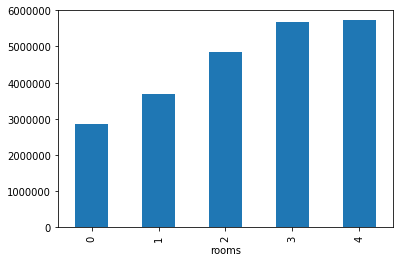

In [84]:
from_rooms = ok_df.groupby('rooms')['last_price'].mean()
from_rooms.plot(x='rooms', y='last_price', kind='bar')

Можно сказать, что график подтверждает вышесказанные выводы. И даже можно добавить, что влияние больше, чем "малое" и видим прямую зависимость от цены.

In [85]:
ok_df['last_price'].corr(df['city_centers_nearest'], 'spearman') # используем коэффицнт Спирмена

-0.31118863423329807

Данная связь умеренная и зависимость обратная, что говорит о малом влиянии на цену

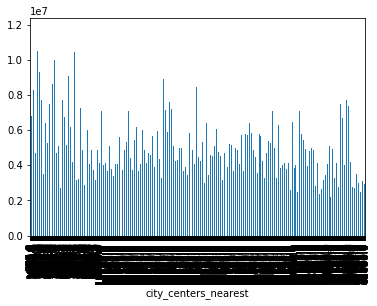

In [86]:
from_nearest = ok_df.groupby('city_centers_nearest')['last_price'].mean()
from_nearest.plot(x='city_centers_nearest', y='last_price', kind='bar')

Можно сказать, что график подтверждает вышесказанные выводы. Видно, что сначала мы видим обратную динамику, но все же далле, зависимость не наблюдается.

In [87]:
from_floor = ok_df.groupby('floor_level')['price_metr'].mean()
from_floor

floor_level
другой       94901.287896
первый       77927.845989
последний    83211.556137
Name: price_metr, dtype: float64

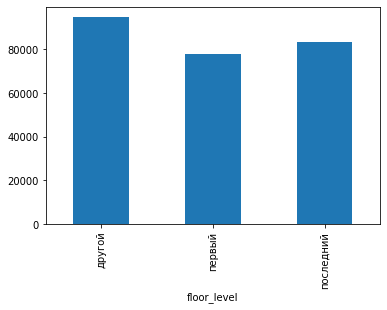

In [88]:
from_floor.plot(x='floor_level', y='price_metr', kind='bar')

Тут можно заметить, что самая низкая цена за кв. м у квартир, находящихся на первом этаже. И сказать что, чем выше этаж, тем дороже квартира - это будет неправильно, ведь на последнем этаже цена за м кв. не самая дорога. И отсюда можно сделать вывод, что связь умеренная.  

In [89]:
from_time = ok_df.groupby('weekday')['price_metr'].mean()
from_time

weekday
0    91067.500381
1    91143.690383
2    91825.605378
3    91503.198391
4    91519.781828
5    91483.254925
6    91309.358798
Name: price_metr, dtype: float64

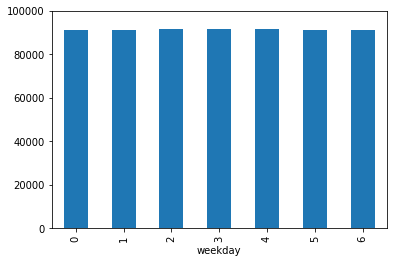

In [90]:
from_time.plot(x='weekday', y='price_metr', kind='bar', ylim=(0,100000))

На графике видно, что независимо от дня недели цена за кв. м практически не меняется. Отсюда следует, что связь слабая и не влияет на цену.

In [91]:
from_time1 = ok_df.groupby('weekday')['price_metr'].mean()
from_time1

weekday
0    91067.500381
1    91143.690383
2    91825.605378
3    91503.198391
4    91519.781828
5    91483.254925
6    91309.358798
Name: price_metr, dtype: float64

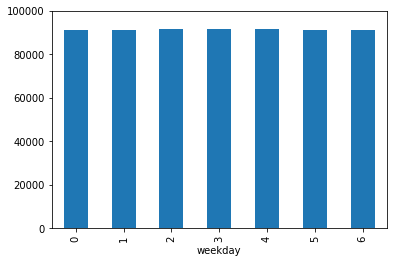

In [92]:
from_time1.plot(x='weekday', y='price_metr', kind='bar', ylim=(0,100000))

На графике видно, что независимо от месяца цена за кв. м практически не меняется. Отсюда следует, что связь слабая и не влияет на цену.

In [93]:
from_time2 = ok_df.groupby('year')['price_metr'].mean()
from_time2

year
2015     88019.167220
2016     89313.275691
2017     89772.203878
2018     92252.714195
2019    102412.638201
Name: price_metr, dtype: float64

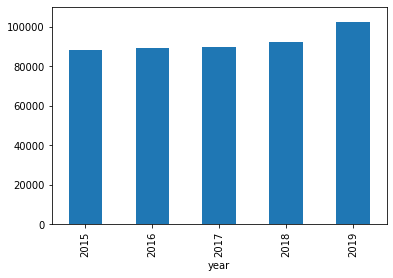

In [94]:
from_time2.plot(x='year', y='price_metr', kind='bar', ylim=(0,110000))

А вот тут видна динамика, с каждым годом квартиры становились только дороже, к счастью, незначительно). Можно сказать, что связь существует и она умеренна, что говорит о малом влияние на цену.

**Вывод**

В данном пункте мы изучили влиянии факторов на стоимость квартир. В результате мы получили:

Факторы, оказывающие влияние на стоимость: площадь квартиры, количество комнат, этаж и год подачи объявления.

**10 населённых пунктов** с наибольшим числом объявлений:

In [95]:
count_name = ok_df['locality_name'].value_counts()
count_name = count_name[0:11]
count_name

Санкт-Петербург      9787
посёлок Мурино        473
посёлок Шушары        374
Всеволожск            292
посёлок Парголово     281
Колпино               270
деревня Кудрово       262
Пушкин                230
Гатчина               221
Выборг                167
Петергоф              150
Name: locality_name, dtype: int64

Cредняя цена квадратного метра в этих населённых пунктах:

In [96]:
count_name1 =ok_df.query('locality_name == ("Санкт-Петербург", "посёлок Мурино", "посёлок Шушары", "Всеволожск", "посёлок Парголово", "Колпино", "деревня Кудрово", "Пушкин", "Гатчина", "Выборг", "Петергоф")')
count_name2 = count_name1.pivot_table(aggfunc='mean', index='locality_name', values='price_metr')
count_name2

,price_metr
locality_name,
Всеволожск,66769.689744
Выборг,57463.229645
Гатчина,68032.129104
Колпино,74847.159378
Петергоф,81886.928004
Пушкин,98717.914606
Санкт-Петербург,103831.436432
деревня Кудрово,92600.842924
посёлок Мурино,85912.271049


In [97]:
count_name2.describe()

,price_metr
count,11.000000
mean,81580.716702
std,14262.204335
min,57463.229645
25%,71439.644241
50%,81886.928004
75%,91013.606887
max,103831.436432


Таким образом, самое дорогое жилье в Санкт-Петербурге, а самое дешевое в Выборге.

**Изучим удалленость от центра**

In [98]:
piter = ok_df.query('locality_name == "Санкт-Петербург"')
piter['piter_centers_nearest'] = (piter['city_centers_nearest']/1000).round()
piter[['city_centers_nearest','piter_centers_nearest']].head()

,city_centers_nearest,piter_centers_nearest
9,15008.0,15.0
10,13878.0,14.0
15,14259.0,14.0
18,10842.0,11.0
21,9722.0,10.0


In [99]:
piter.pivot_table(index='piter_centers_nearest', values='price_metr', aggfunc='mean').head(10) # средняя цена для каждого км

,price_metr
piter_centers_nearest,
0.0,114373.749500
1.0,121741.329746
2.0,119083.314316
3.0,108255.571273
4.0,121270.269144
5.0,123664.076529
6.0,124513.284436
7.0,118389.441266
8.0,114770.138997


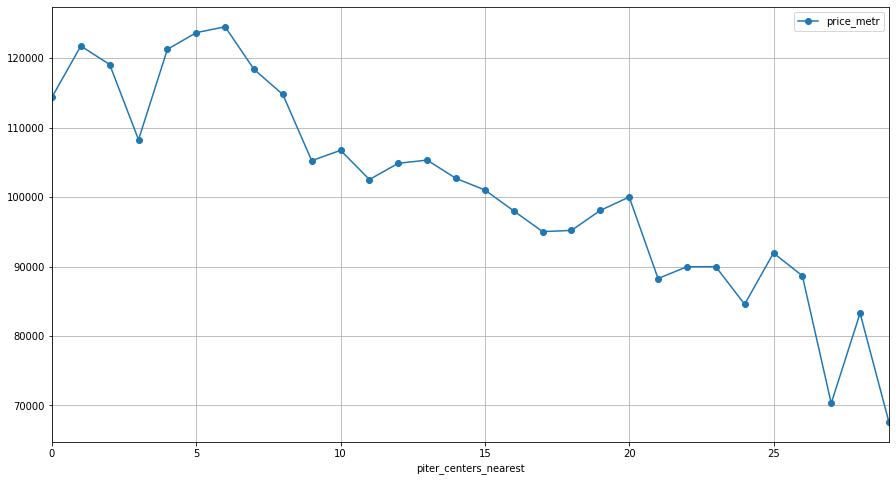

In [100]:
(piter.pivot_table(index='piter_centers_nearest', values='price_metr', aggfunc='mean')
 .plot(style='o-', grid=True, figsize=(15,8)))

По рисунку видно, что около 7 км  график начинает убывать. Будем считать что 7 км - центральная зона

Квартиры в **центре** города

In [101]:
piter_center = piter[piter['piter_centers_nearest']<=7]
piter_center

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_metr,weekday,month,year,floor_level,living_to_total,kitchen_to_total,fast,slow,piter_centers_nearest
24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.500000,1,False,...,66872.427984,5,10,2015,первый,0.48,0.20,False,False,2.0
94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.600000,2,False,...,118644.067797,4,4,2019,другой,0.53,0.19,True,False,7.0
99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.000000,2,False,...,106666.666667,1,9,2017,другой,0.74,0.09,False,False,3.0
111,4,4590000.0,40.0,2017-05-29,1,2.65,6,18.000000,1,False,...,114750.000000,0,5,2017,первый,0.45,0.25,False,False,6.0
138,8,4800000.0,40.0,2017-11-18,2,2.65,3,29.000000,2,False,...,120000.000000,5,11,2017,другой,0.72,0.15,False,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23632,20,5000000.0,38.0,2018-06-23,1,2.55,16,21.468023,15,False,...,131578.947368,5,6,2018,другой,0.56,0.19,False,False,7.0
23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.300000,4,False,...,79840.000000,3,4,2018,последний,0.52,0.19,False,False,4.0
23665,11,4250000.0,47.0,2016-05-20,1,2.65,6,18.200000,1,False,...,90425.531915,4,5,2016,первый,0.39,0.31,False,False,5.0
23681,13,5250000.0,43.0,2018-05-11,2,2.50,5,29.000000,2,False,...,122093.023256,4,5,2018,другой,0.67,0.14,False,False,7.0


In [102]:
piter_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1012.000000,1.012000e+03,1012.000000,1012.000000
mean,59.007154,6.899729e+06,2.055336,2.658508
std,18.681801,2.126412e+06,0.869815,0.071455
min,12.000000,1.686000e+06,0.000000,2.460000
25%,44.000000,5.300000e+06,1.000000,2.650000
50%,57.650000,6.700000e+06,2.000000,2.650000
75%,72.000000,8.500000e+06,3.000000,2.650000
max,100.000000,1.185000e+07,4.000000,2.850000


Из данной таблицы можно сделать следующие выводы:
- в среднем, в центре, встречаются квартиры площадью 60 кв. м
- средняя стоимость квартиры в центре 7 миллионов
- в центре преобладают двухкомнатные квартиры
- высоту потолков оценивать некорректно, так как мы заполняли пропуски медианой

In [103]:
piter_center[['total_area', 'last_price', 'rooms', 'city_centers_nearest']].corr()

,total_area,last_price,rooms,city_centers_nearest
total_area,1.000000,0.692515,0.767433,-0.156739
last_price,0.692515,1.000000,0.390656,-0.097343
rooms,0.767433,0.390656,1.000000,-0.154521
city_centers_nearest,-0.156739,-0.097343,-0.154521,1.000000


Из данной таблицы можно сделать следующие выводы:
- сильная связь между **общей площадью** и ценой, что говорит о большом влияние на цену
- умеренная связь между **количеством комнат** и ценой, что говорит о незначительном влиянии на цену
- слабая связь между **расстоянием до центра** и ценой говорит о том,  что расстояние и цена обратно зависимо и почти не влияют друг на друга

In [104]:
piter[['total_area', 'last_price', 'rooms', 'city_centers_nearest']].corr()

,total_area,last_price,rooms,city_centers_nearest
total_area,1.000000,0.787771,0.785355,-0.096391
last_price,0.787771,1.000000,0.472385,-0.276151
rooms,0.785355,0.472385,1.000000,-0.071682
city_centers_nearest,-0.096391,-0.276151,-0.071682,1.000000


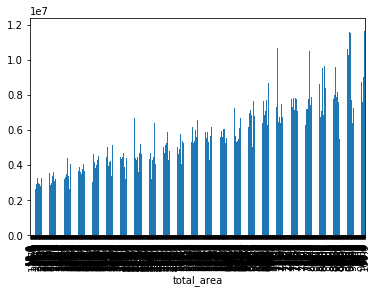

In [105]:
from_areas = piter.groupby('total_area')['last_price'].mean()
from_areas.plot(x='total_area', y='last_price', kind='bar')

Можно сказать, что график подтверждает значение коэффицента корреляции. Чем больше площадь, тем больше цена.

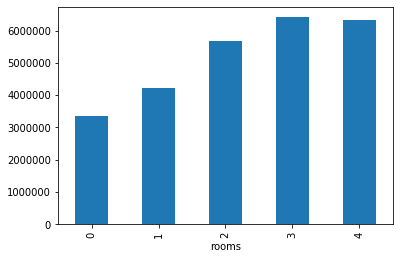

In [106]:
from_room = piter.groupby('rooms')['last_price'].mean()
from_room.plot(x='rooms', y='last_price', kind='bar')

Можно сказать, что график подтверждает значение коэффициента корреляции. Чем больше комнат, тем больше цена.

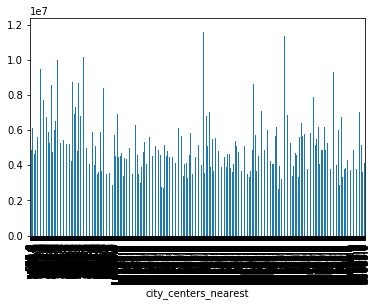

In [107]:
from_near = piter.groupby('city_centers_nearest')['last_price'].mean()
from_near.plot(x='city_centers_nearest', y='last_price', kind='bar')

На данном графике не прослеживается никакая зависимость, что говорит о том, что расстояние практически не влияет на цену.

Коэффициенты корреляции центрального района и города всего в целом несильно различаются. Однако можно подметить присутствие тенденции снижения цены квартиры в зависимости от расстояния.

In [108]:
from_floor2 = piter_center.groupby('floor_level')['last_price'].mean()
from_floor2

floor_level
другой       7.149269e+06
первый       5.636869e+06
последний    6.919764e+06
Name: last_price, dtype: float64

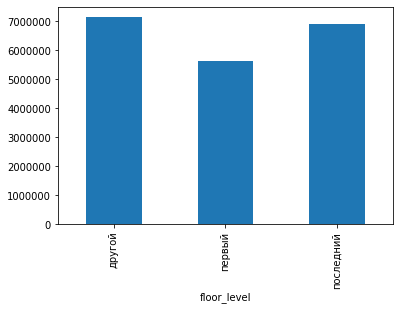

In [109]:
from_floor2.plot(x='floor_level', y='last_price', kind='bar')

Самые дорогие квартиры находятся ни на первом, ни на последнем этаже.

Самые дешевые - на первом.

Такая же тенденция есть и в других объявлениях самые дешевые квартиры на 1 этаже.

In [110]:
from_week2 = piter_center.groupby('weekday')['last_price'].mean()
from_week2

weekday
0    6.775074e+06
1    6.784153e+06
2    6.999931e+06
3    6.690570e+06
4    7.038808e+06
5    6.885922e+06
6    7.545789e+06
Name: last_price, dtype: float64

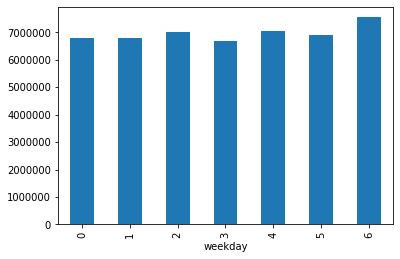

In [111]:
from_week2.plot(x='weekday', y='last_price', kind='bar')

От даты размещения цена не зависит, в течение всей неделе цена колеблется  в отрезке от 6 до 7 млн.

## Общий вывод

В данном объёмном исследовании найдены ответы на все вопросы:

**1. Сколько обычно занимает  продажа квартиры на сервисе?**
- Обычно квартиры продаются за 95 дней
- Быстрой продажей считается менее чем за 45 дней
- Очень долго продажей является срок более 2 лет 

**2. Какие факторы больше всего влияют на стоимость квартиры?**
- Больше всего на величину стоимости влияет общая площадь квартиры, в прямой зависимости
- Также стоит отметить, чем больше комнат и ближе к городу, тем больше цена
- Квартиры на первых и последних этажах дешевле, чем на других
- День подачи заявлений никак не влияет на стоимость

**3. Где самая дорогие квартиры и наоборот?**
- Самая высокая цена в Санкт-Петербурге 
- Самая низкая в Выборге

**4. Что считается центральным районам Питера?**
- На основе данных о средней стоимости квартир, мы опредилили в радиусе 7 км
- Цена в данном районе в среднем составляет 7 млн
- Средняя цена за пределами центра составляет 5 млн
- Квартир с большой площадью преимущественно  больше в центральном рай